## Prepare

In [15]:
import gym 
import robohive
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm
from IPython.display import Image as IPyImage

    RoboHive: A unified framework for robot learning | https://sites.google.com/view/robohive
        Code: https://github.com/vikashplus/robohive/stargazers (add a star to support the project)
    


/home/lklimkiewicz/miniconda3/envs/robohive_plus/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


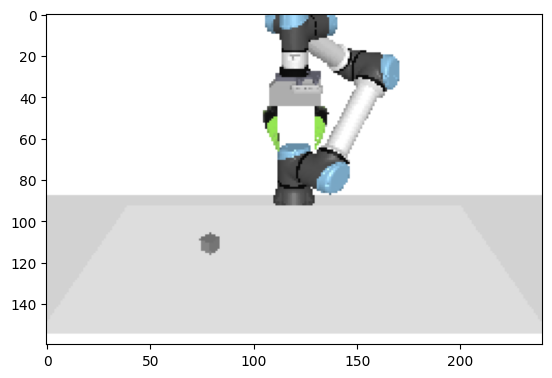

In [2]:
env = gym.make('Ur5Cube-v0')
env.reset();

obs = env.get_obs(update_exteroception=True)
plt.imshow(env.visual_dict['rgb:front:160x240:2d']);

## Replay trajectory

In [55]:
def save_gif(images, path='tmp.gif', width=300, duration=100):
    images[0].save(path, format="GIF", append_images=images, save_all=True, duration=duration, loop=0)
    
    with open(path,'rb') as f:
        return IPyImage(data=f.read(), format='png', width=width)

In [45]:
def get_joints_from_step(step):
    position = step['ee_position']
    orientation = step['ee_orientation']
    joints = env.robot.inverse_kinematics(position, orientation)
    assert joints is not None, 'Failed to move arm to given position'
    joints = np.concatenate([joints, [step['positions'][-2]]])
    return joints

In [52]:
def replay_trajectory(trajectory, camera_name='rgb:front:160x240:2d'):
    images = []
    
    initial_joints = get_joints_from_step(trajectory[0])
    for _ in range(100):
        env.step(initial_joints)
        
    for step in tqdm(trajectory):
        joints = get_joints_from_step(step)
        for _ in range(1):
            env.step(joints)
            
        env.get_obs(update_exteroception=True)
        
        image = env.visual_dict[camera_name]
        images.append(Image.fromarray(image))
        
    return {
        'images': images,
    }
        

In [38]:
trajectory = np.load('trajectory.npy', allow_pickle=True)

In [53]:
result = replay_trajectory(trajectory)
images = result['images']

100%|██████████| 179/179 [00:01<00:00, 174.97it/s]


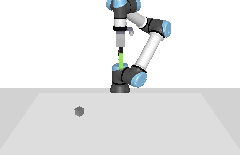

In [56]:
save_gif(images, 'grasp.gif', duration=25)

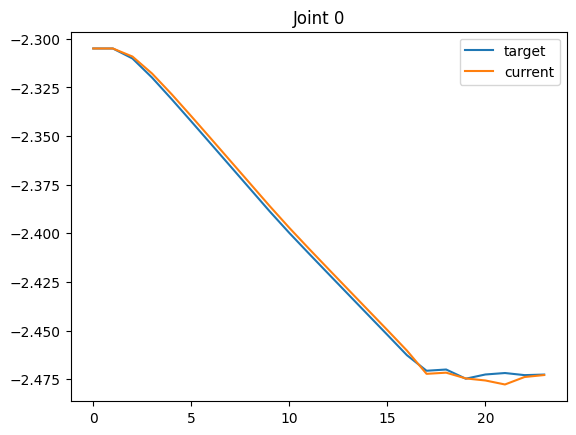

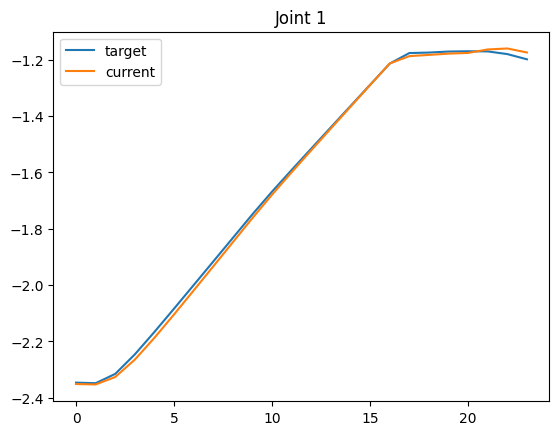

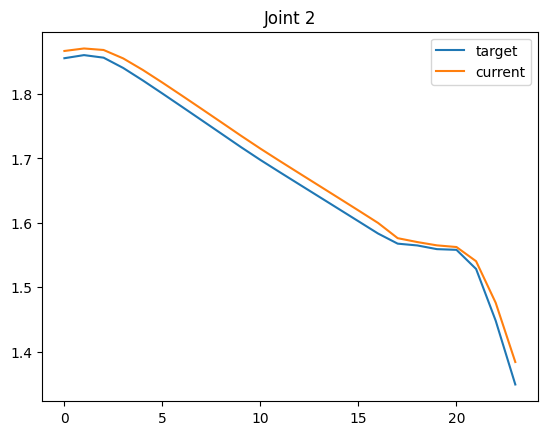

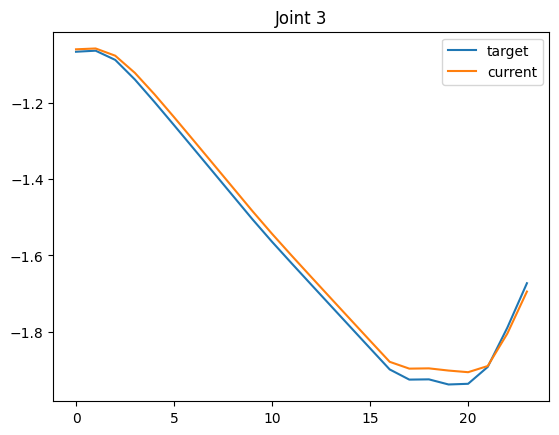

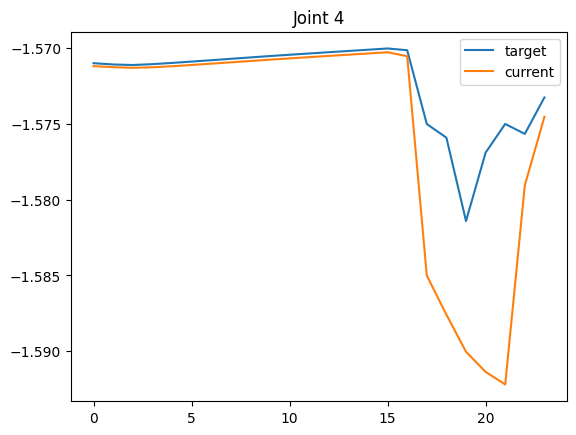

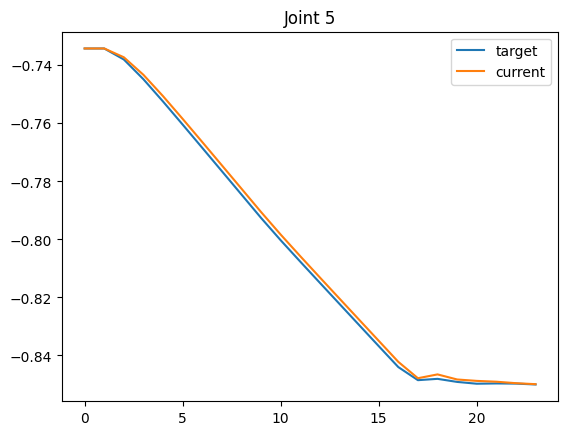

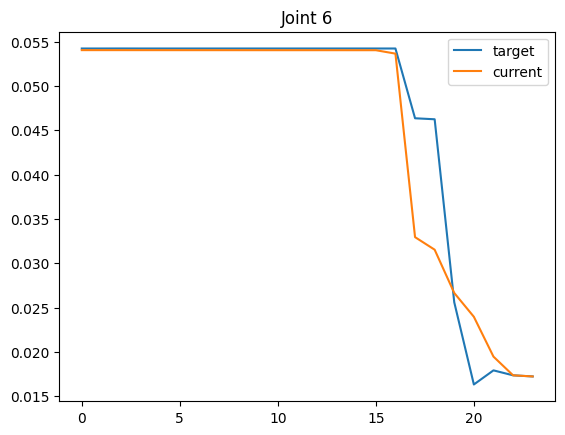

In [16]:
for i in range(7):
    plt.plot(target[:, i], label='target')
    plt.plot(current[:, i], label='current')
    plt.title(f'Joint {i}')
    plt.legend()
    plt.show()

## Cameras

rgb:top_down:160x240:2d


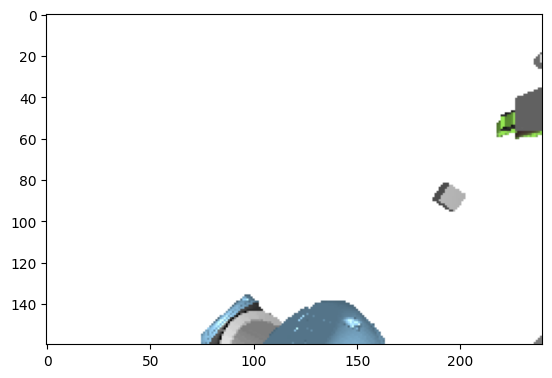

rgb:front:160x240:2d


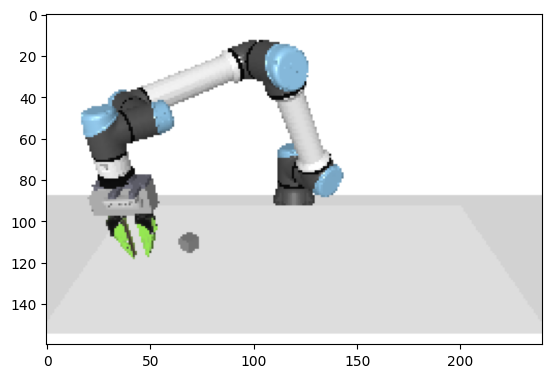

rgb:gripper:160x240:2d


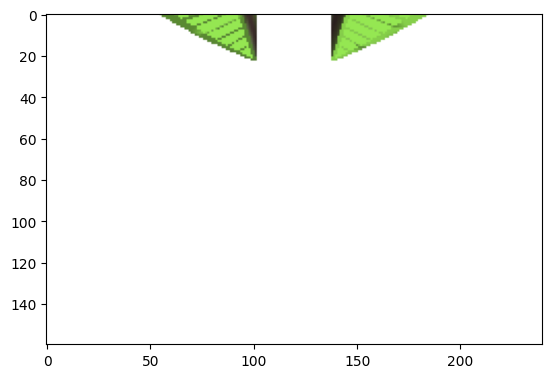

In [17]:
extero_dict = env.get_exteroception()
obs = env.get_obs(update_exteroception=True)
for key in env.visual_dict.keys():
    if key == 'time':
        continue
    print(key)
    plt.imshow(env.visual_dict[key])
    plt.show()